In [61]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/Pytorch-Models

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models


In [ ]:
!git clone https://github.com/xingyizhou/CenterNet.git /content/gdrive/MyDrive/Pytorch-Models/CenterNet

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Cloning into '/content/gdrive/MyDrive/Pytorch-Models/CenterNet'...
remote: Enumerating objects: 397, done.
remote: Total 397 (delta 0), reused 0 (delta 0), pack-reused 397 (from 1)
Receiving objects: 100% (397/397), 6.26 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (179/179), done.


In [2]:
!ln -s /content/gdrive/MyDrive/Pytorch-Models/CenterNet /content/CenterNet
%cd /content/CenterNet

/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet


In [ ]:
!pip install cython
!pip install -r requirements.txt

In [ ]:
!pip install progress

In [5]:
%cd /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2

/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2


In [ ]:
%cd /content
!git clone https://github.com/lbin/DCNv2.git
%cd /content/DCNv2
!git checkout pytorch_2.0.1
!python setup.py build develop

In [7]:
!rm -rf /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2
!cp -r /content/DCNv2 /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2

In [62]:
%cd /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src

/content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src


In [ ]:
!python demo.py multi_pose --demo /content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth, epoch 320
Figure(1000x1000)
Figure(640x480)
tot 0.446s | load 0.009s | pre 0.011s | net 0.271s | dec 0.148s | post 0.006s | merge 0.000s | 


In [ ]:
!python demo.py multi_pose --demo /content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth

In [ ]:
!python demo.py ctdet --demo /content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg --load_model /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth

NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
NMS not imported! If you need it, do 
 cd $CenterNet_ROOT/src/lib/external 
 make
Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth, epoch 230
Figure(1000x1000)
Figure(640x480)
tot 0.372s | load 0.010s | pre 0.011s | net 0.277s | dec 0.072s | post 0.002s | merge 0.000s | 


In [63]:
import sys
CENTERNET_PATH = "/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/"
sys.path.insert(0, CENTERNET_PATH)

In [64]:
import sys
sys.path.append('/content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/models/networks/DCNv2')

In [13]:
from opts import opts
from detectors.detector_factory import detector_factory
import cv2

args = [
    'ctdet',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)

Detector = detector_factory[opt.task]
detector = Detector(opt)

img = cv2.imread('/content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg')
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)

score_thr = 0.4

boxresults = results['results']
for cls_id, detections in boxresults.items():
    for det in detections:
        bbox = det[0:4]          # [xmin, ymin, xmax, ymax]
        score = det[4]           # confidence score

        if score < score_thr:
            continue  # Skip detections below threshold

        print(f"Class: {cls_id}, Score: {score:.4f}")
        print(f"  BBox: [{bbox[0]:.2f}, {bbox[1]:.2f}, {bbox[2]:.2f}, {bbox[3]:.2f}]")

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth, epoch 230
Class: 1, Score: 0.8602
  BBox: [452.06, 38.89, 537.43, 335.40]
Class: 1, Score: 0.8468
  BBox: [66.34, 38.87, 155.12, 333.42]
Class: 1, Score: 0.8026
  BBox: [50.39, 370.56, 155.57, 665.04]
Class: 1, Score: 0.7956
  BBox: [73.22, 703.44, 159.09, 989.53]
Class: 1, Score: 0.7920
  BBox: [446.42, 369.55, 557.27, 667.20]
Class: 1, Score: 0.7864
  BBox: [251.78, 371.21, 364.81, 664.22]
Class: 1, Score: 0.7474
  BBox: [253.82, 40.26, 346.53, 332.21]
Class: 1, Score: 0.7357
  BBox: [458.37, 700.30, 532.93, 991.83]
Class: 1, Score: 0.7235
  BBox: [269.82, 702.44, 346.40, 990.15]


In [ ]:
from opts import opts
from detectors.detector_factory import detector_factory
import cv2

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)

Detector = detector_factory[opt.task]
detector = Detector(opt)

img = cv2.imread('/content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg')
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)

keypoints = results['results']
for cls_id, detections in keypoints.items():
    for det in detections:
        bbox = det[0:4]          # [xmin, ymin, xmax, ymax]
        score = det[4]           # confidence score
        keypoints_coords = det[5:]  # remaining are keypoints (x1,y1,x2,y2,...)

        print(f"Class: {cls_id}, Score: {score:.4f}")
        print(f"  BBox: [{bbox[0]:.2f}, {bbox[1]:.2f}, {bbox[2]:.2f}, {bbox[3]:.2f}]")
        # Group keypoints into pairs for easier reading
        keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i+1]) for i in range(0, len(keypoints_coords), 2)]
        print(f"  Keypoints:")
        for i, (x, y) in enumerate(keypoints_pairs):
            print(f"    KP{i}: ({x:.1f}, {y:.1f})")

In [ ]:
skeleton = [
    [0, 1], [0, 2],       # Nose to eyes (face/head)
    [1, 3], [2, 4],       # Eyes to ears
    [3, 5], [4, 6],       # Ears to shoulders
    [5, 6],               # Shoulders
    [5, 7], [7, 9],       # Left Arm
    [6, 8], [8, 10],      # Right Arm
    [5, 11], [6, 12],     # Torso
    [11, 12],             # Hip
    [11, 13], [13, 15],   # Left Leg
    [12, 14], [14, 16],   # Right Leg
]

# Color mapping per edge group (BGR)
COLORS = {
    'face': (203, 192, 255),    # light pink
    'shoulders': (255, 255, 255), # white
    'left_arm': (0, 165, 255),    # orange
    'right_arm': (0, 165, 255), # orange
    'torso': (0, 255, 0),       # green
    'hip': (255, 255, 255),     # white
    'left_leg': (255, 255, 0),  # cyan
    'right_leg': (255, 255, 0),   # cyan
}

# Map edges to groups
edge_to_group = {
    (0, 1): 'face', (0, 2): 'face', (1, 3): 'face', (2, 4): 'face',
    (3, 5): 'face', (4, 6): 'face',
    (5, 6): 'shoulders',
    (5, 7): 'left_arm', (7, 9): 'left_arm',
    (6, 8): 'right_arm', (8, 10): 'right_arm',
    (5, 11): 'torso', (6, 12): 'torso',
    (11, 12): 'hip',
    (11, 13): 'left_leg', (13, 15): 'left_leg',
    (12, 14): 'right_leg', (14, 16): 'right_leg',
}

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth, epoch 320


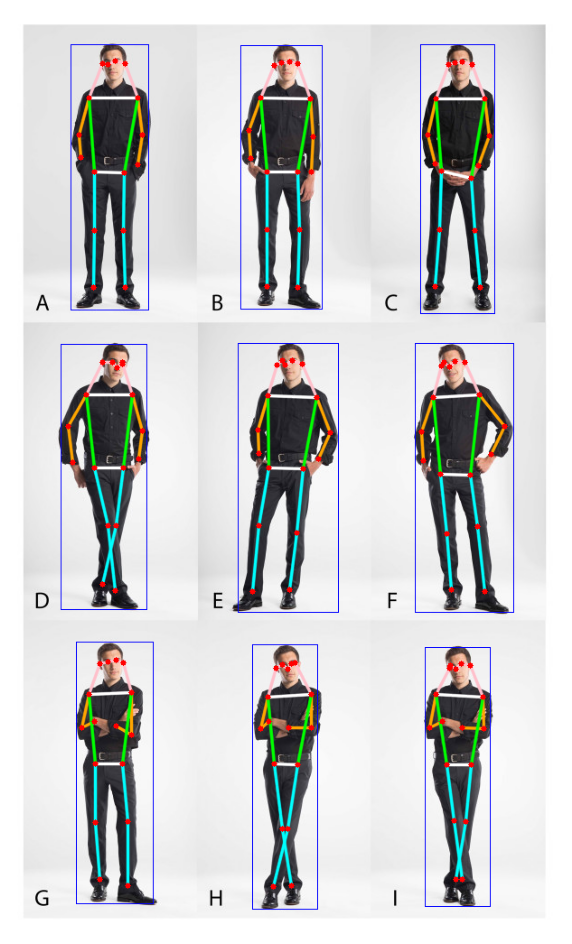

In [ ]:
import cv2
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 1)

    # Draw skeleton lines with colors by body parts
    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                group = edge_to_group.get((start_idx, end_idx), 'face')
                color = COLORS[group]
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 2, lineType=cv2.LINE_AA)

    # Draw keypoints as red dots
    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 3, (0, 0, 255), -1)

from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

img_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg'
img = cv2.imread(img_path)
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)
keypoints = results['results']

CONF_THRESHOLD = 0.3

for cls_id, detections in keypoints.items():
    for det in detections:
        score = det[4]
        if score < CONF_THRESHOLD:
            continue

        bbox = det[0:4]
        keypoints_coords = det[5:]
        keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

        draw_keypoints_and_skeleton(img, bbox, keypoints_pairs, draw_bbox=True)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(img_rgb)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 1)

    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                group = edge_to_group.get((start_idx, end_idx), 'face')
                color = COLORS[group]
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 2, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 3, (0, 0, 255), -1)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth, epoch 320


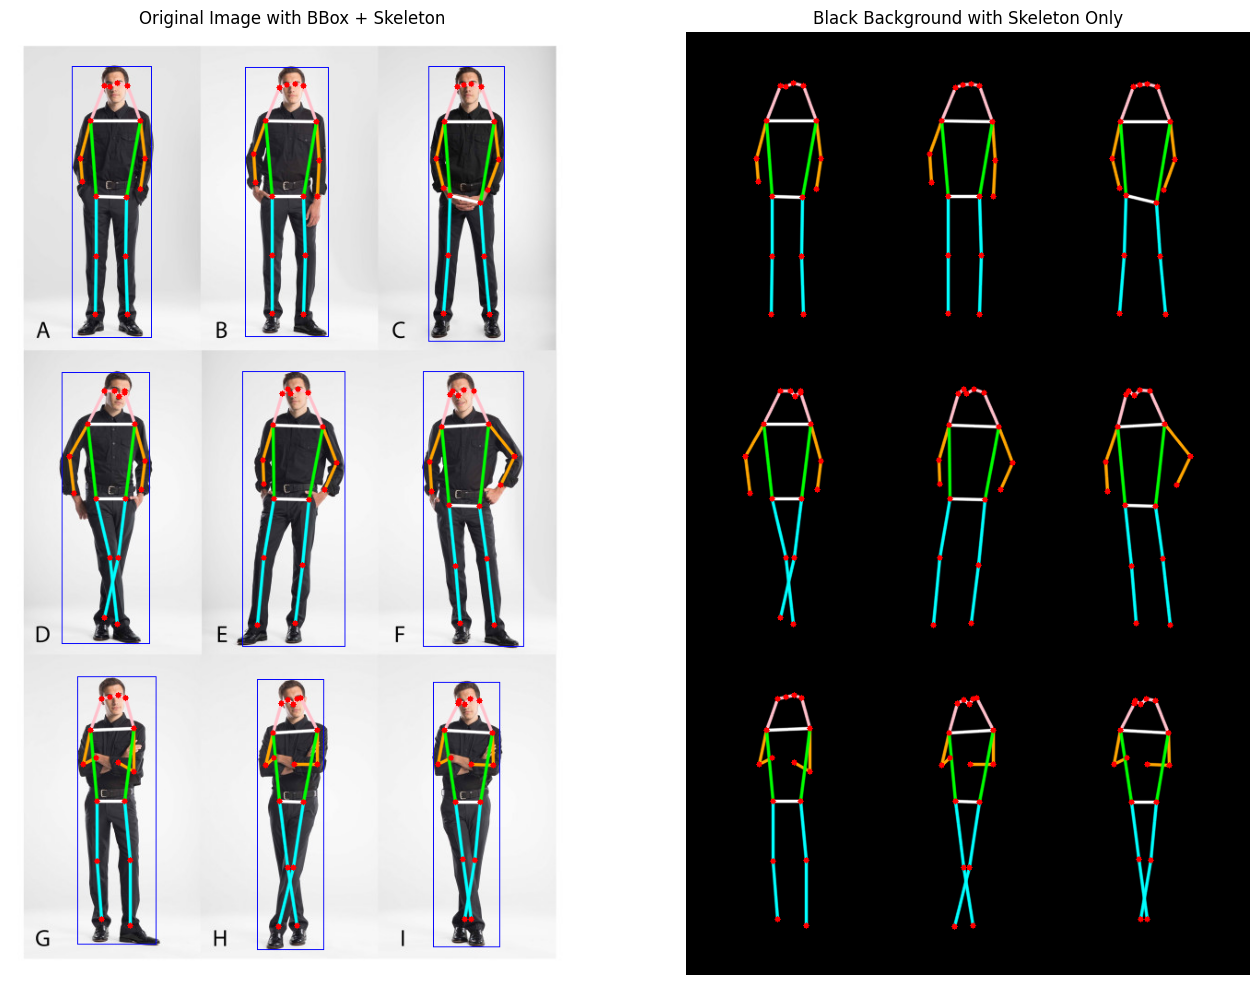

In [ ]:
from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

img_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/coco_5k/Male-Posing.jpg'
img = cv2.imread(img_path)
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)
keypoints = results['results']

CONF_THRESHOLD = 0.3

# Prepare images:
img_with_bbox = img.copy()
img_skeleton_only = np.zeros_like(img)  # black image same size as original

for cls_id, detections in keypoints.items():
    for det in detections:
        score = det[4]
        if score < CONF_THRESHOLD:
            continue

        bbox = det[0:4]
        keypoints_coords = det[5:]
        keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

        # Draw on original image copy with bbox
        draw_keypoints_and_skeleton(img_with_bbox, bbox, keypoints_pairs, draw_bbox=True)

        # Draw on black image WITHOUT bbox
        draw_keypoints_and_skeleton(img_skeleton_only, bbox, keypoints_pairs, draw_bbox=False)

# Convert BGR to RGB for matplotlib
img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
img_skeleton_only_rgb = cv2.cvtColor(img_skeleton_only, cv2.COLOR_BGR2RGB)

# Plot side-by-side
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.title('Original Image with BBox + Skeleton')
plt.axis('off')
plt.imshow(img_with_bbox_rgb)

plt.subplot(1, 2, 2)
plt.title('Black Background with Skeleton Only')
plt.axis('off')
plt.imshow(img_skeleton_only_rgb)

plt.show()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/multi_pose/default
heads {'hm': 1, 'wh': 2, 'hps': 34, 'reg': 2, 'hm_hp': 17, 'hp_offset': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth, epoch 320


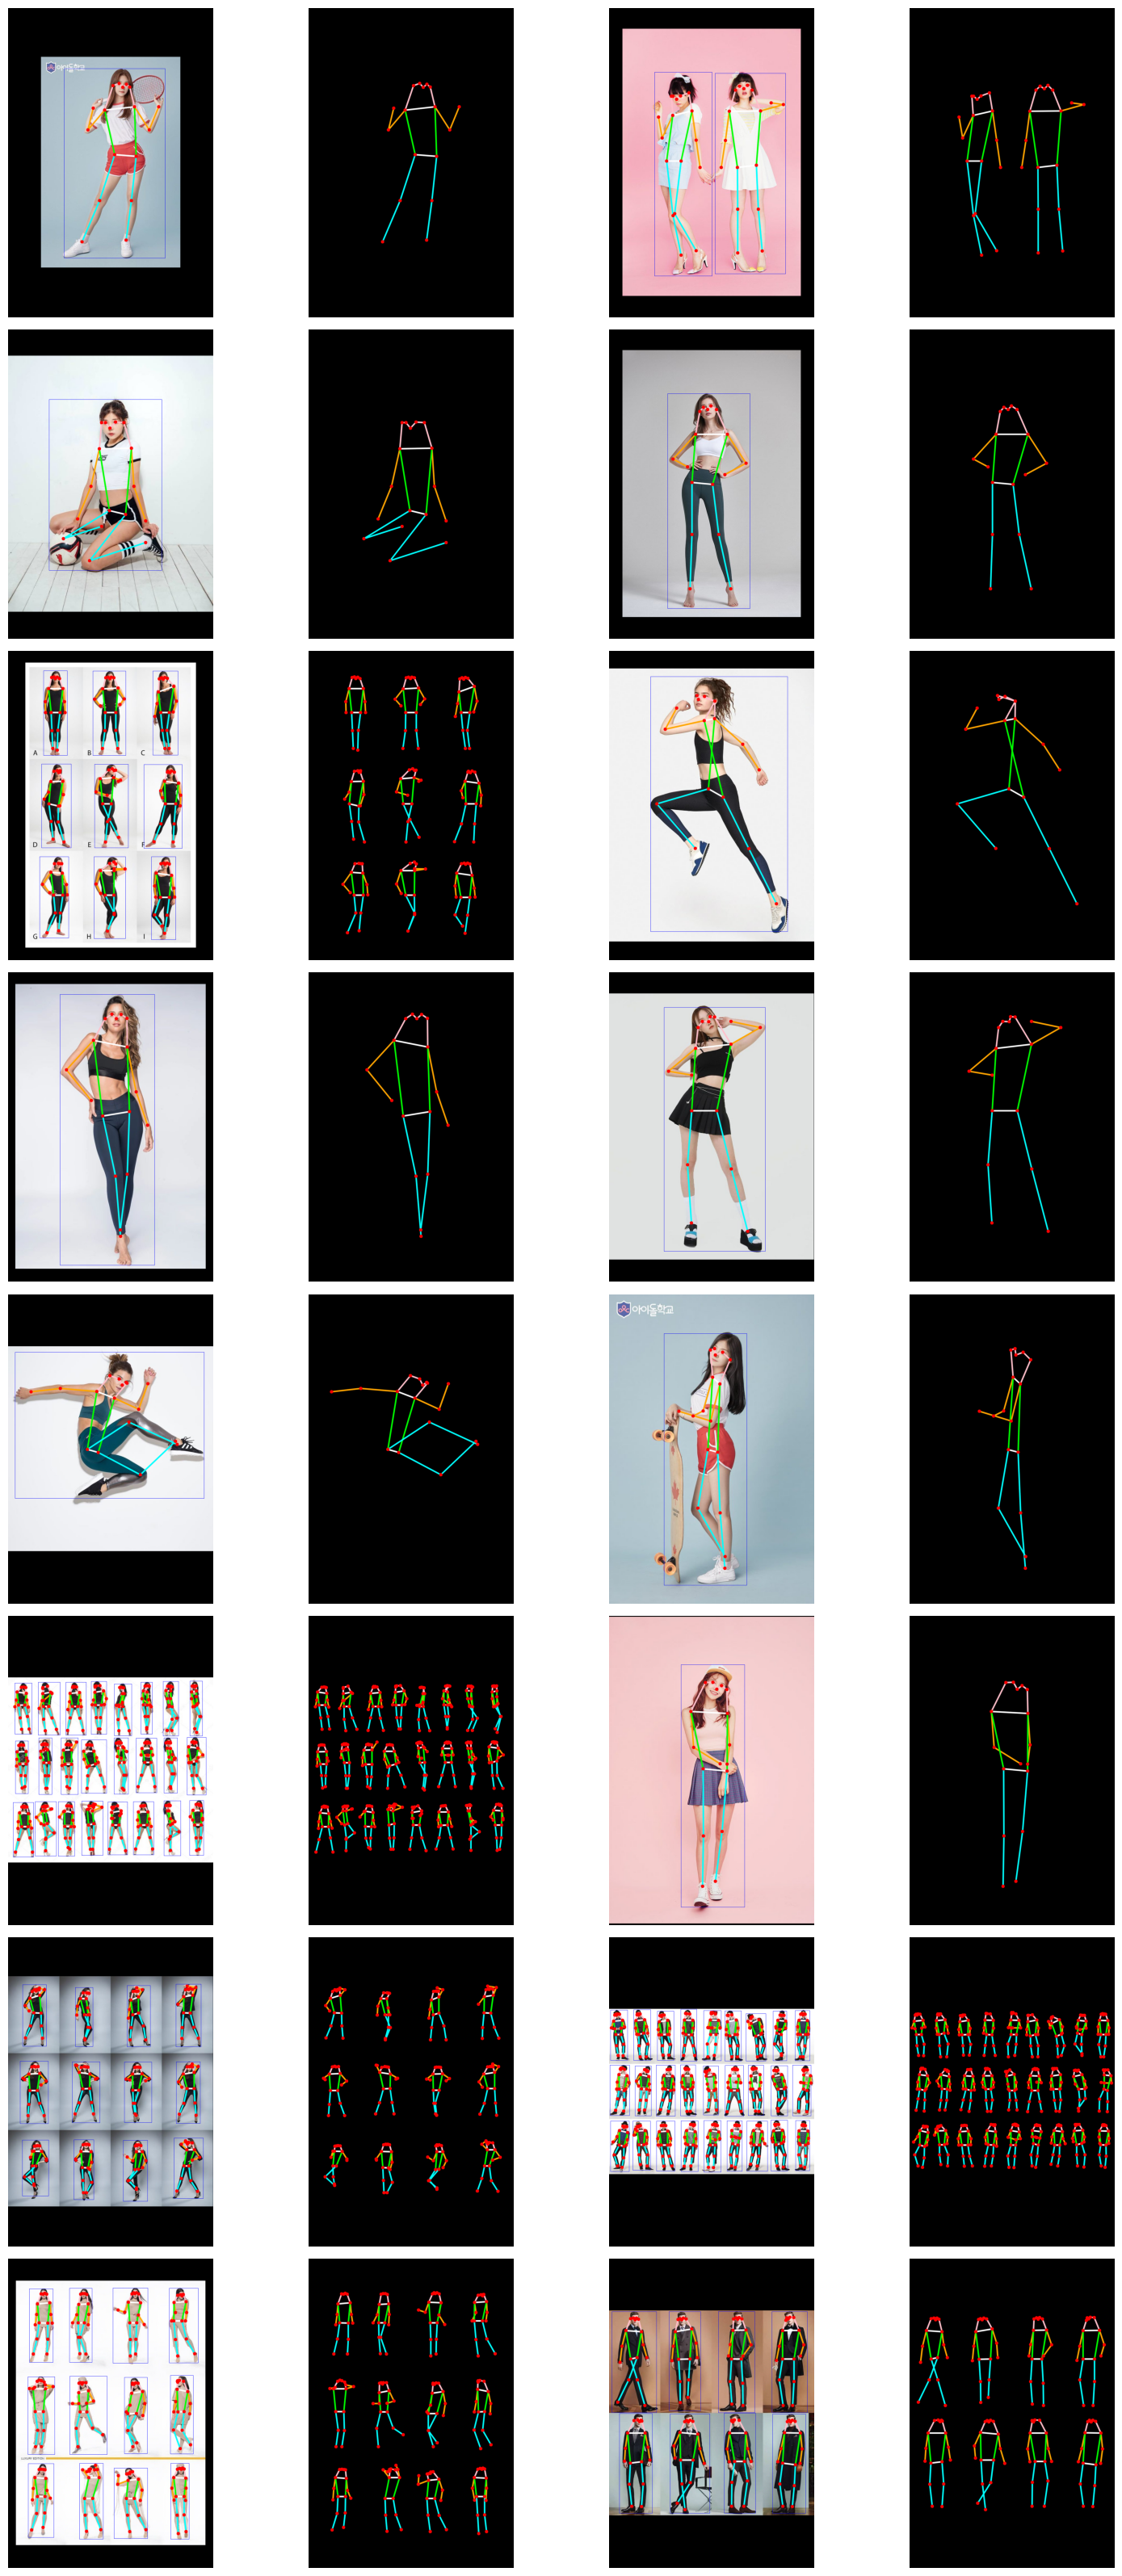

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def draw_keypoints_and_skeleton(img, bbox, keypoints, draw_bbox=True):
    if draw_bbox:
        xmin, ymin, xmax, ymax = map(int, bbox)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 1)

    for edge in skeleton:
        start_idx, end_idx = edge
        if start_idx < len(keypoints) and end_idx < len(keypoints):
            pt1 = keypoints[start_idx]
            pt2 = keypoints[end_idx]
            if all(c > 0 for c in pt1) and all(c > 0 for c in pt2):
                group = edge_to_group.get((start_idx, end_idx), 'face')
                color = COLORS[group]
                cv2.line(img, (int(pt1[0]), int(pt1[1])), (int(pt2[0]), int(pt2[1])), color, 4, lineType=cv2.LINE_AA)

    for x, y in keypoints:
        if x > 0 and y > 0:
            cv2.circle(img, (int(x), int(y)), 6, (0, 0, 255), -1)

# ------------------
# Image folder setup
# ------------------
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests"
num_samples = 16  # you can adjust how many input images to visualize

all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))

img_paths = [os.path.join(val_dir, fname) for fname in selected_imgs]

# ------------------
# Load model
# ------------------
from opts import opts
from detectors.detector_factory import detector_factory

args = [
    'multi_pose',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/multi_pose_dla_3x.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# ------------------
# Process and collect visuals
# ------------------
processed_imgs = []
img_sizes = []

CONF_THRESHOLD = 0.3

for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue

    results = detector.run(img)
    keypoints = results['results']

    # Prepare two outputs
    img_with_bbox = img.copy()
    img_skeleton_only = np.zeros_like(img)

    for cls_id, detections in keypoints.items():
        for det in detections:
            score = det[4]
            if score < CONF_THRESHOLD:
                continue

            bbox = det[0:4]
            keypoints_coords = det[5:]
            keypoints_pairs = [(keypoints_coords[i], keypoints_coords[i + 1]) for i in range(0, len(keypoints_coords), 2)]

            draw_keypoints_and_skeleton(img_with_bbox, bbox, keypoints_pairs, draw_bbox=True)
            draw_keypoints_and_skeleton(img_skeleton_only, bbox, keypoints_pairs, draw_bbox=False)

    # Convert to RGB for matplotlib
    img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
    img_skeleton_only_rgb = cv2.cvtColor(img_skeleton_only, cv2.COLOR_BGR2RGB)

    processed_imgs.append((img_with_bbox_rgb, img_skeleton_only_rgb))
    img_sizes.append(img.shape[:2])  # (height, width)

# ------------------
# Prepare for grid plot
# ------------------
max_height = max(h for h, w in img_sizes)
max_width = max(w for h, w in img_sizes)

cols = 4  # 2 images x 2 visuals = 4 subplots per row
rows = (len(processed_imgs) + 1) // 2  # 2 images per row

plt.figure(figsize=(4 * cols, 4 * rows))

for idx, (img1, img2) in enumerate(processed_imgs):
    for view_idx, view in enumerate([img1, img2]):
        h, w = view.shape[:2]
        top = (max_height - h) // 2
        bottom = max_height - h - top
        left = (max_width - w) // 2
        right = max_width - w - left
        padded = cv2.copyMakeBorder(view, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

        plot_idx = idx * 2 + view_idx + 1
        plt.subplot(rows, cols, plot_idx)
        plt.imshow(padded)
        plt.axis('off')

plt.tight_layout()
plt.show()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/.shortcut-targets-by-id/1aJsbt04Jz9xcLP_lg7fvP4Bpdce6GQlC/Pytorch-Models/CenterNet/src/lib/../../exp/ctdet/default
heads {'hm': 80, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth, epoch 230


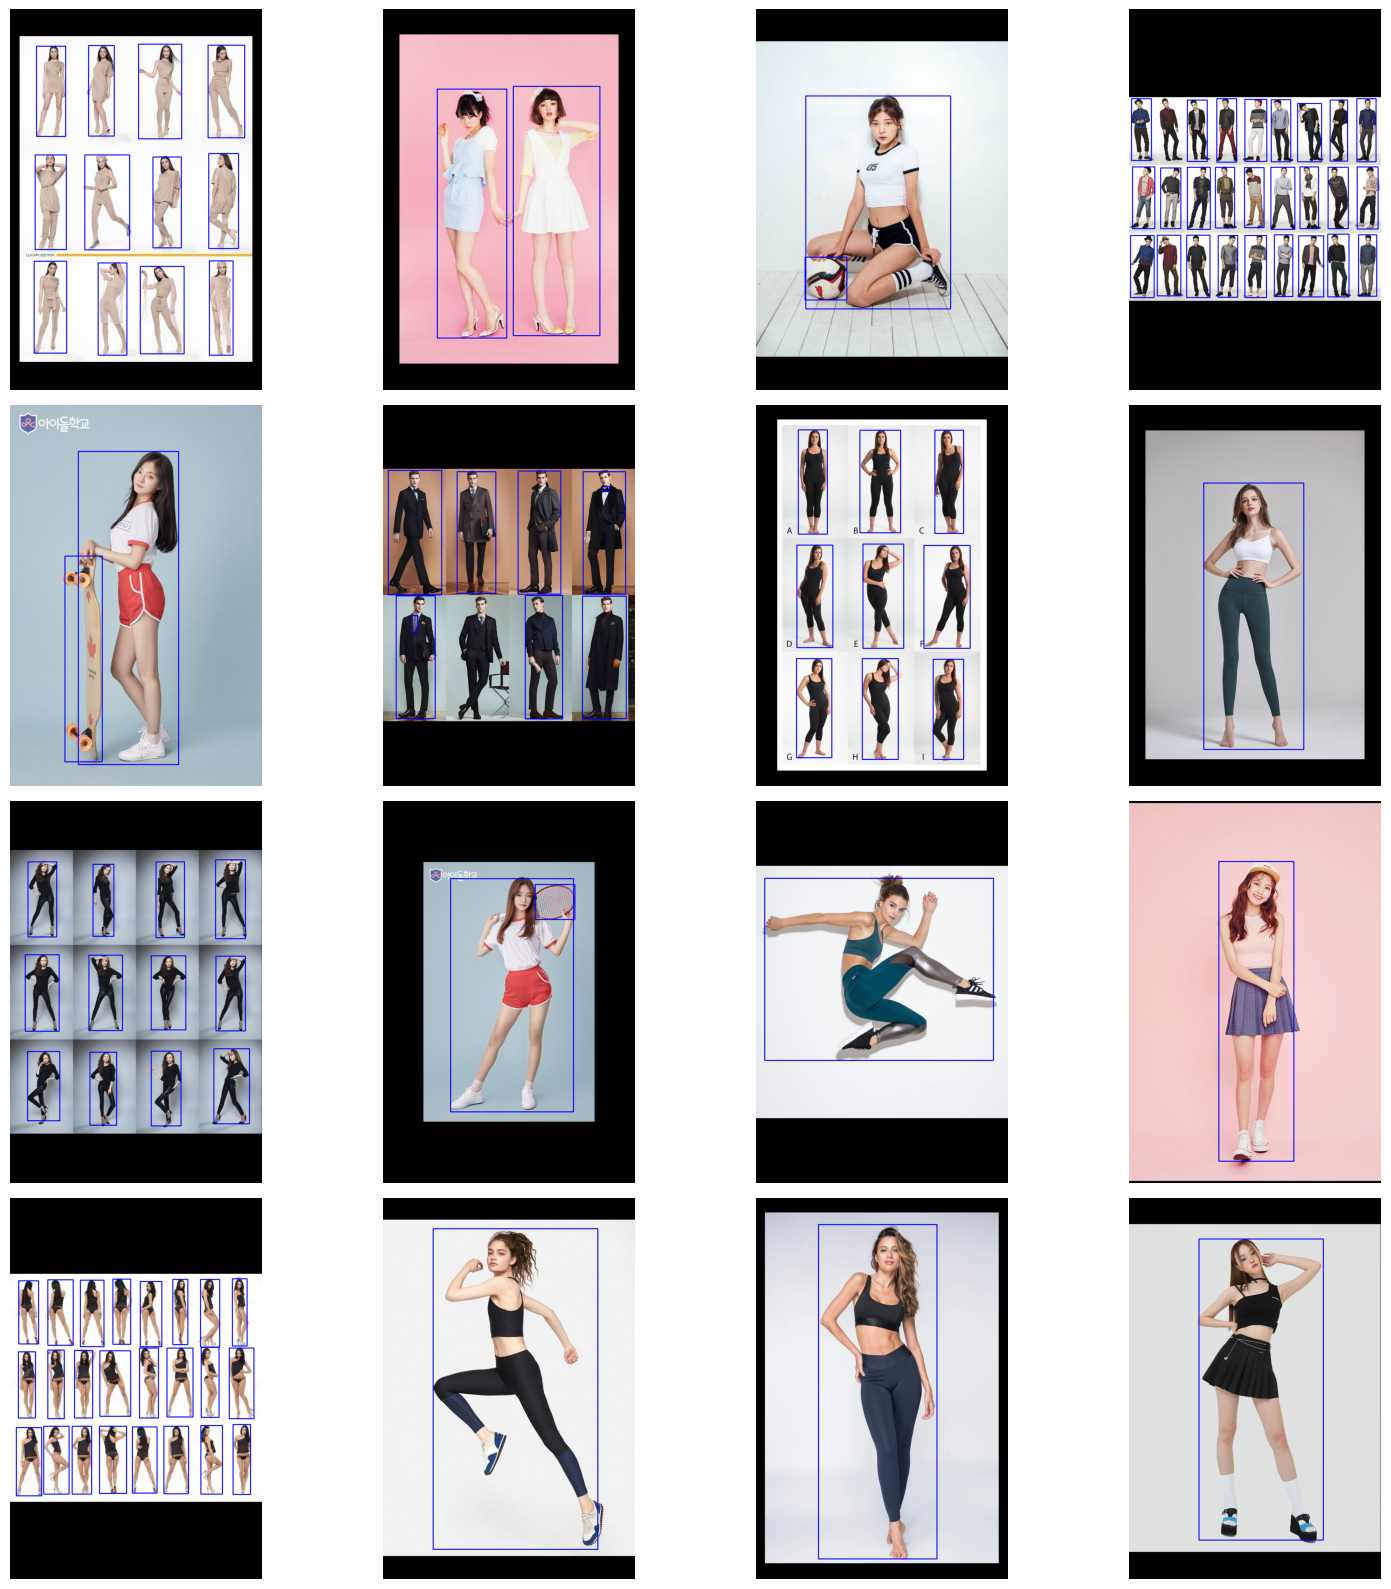

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from opts import opts
from detectors.detector_factory import detector_factory

# --- Init Detector ---
args = [
    'ctdet',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ctdet_coco_dla_2x.pth',
    '--gpus', '0',
    '--debug', '0',
]
opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# --- Parameters ---
val_dir = "/content/gdrive/MyDrive/Pytorch-Models/datasets/pose-tests"
num_samples = 16
score_thr = 0.5

# --- Utils ---
def draw_bbox(img, bbox, color=(255, 0, 0), thickness=2):
    xmin, ymin, xmax, ymax = map(int, bbox)
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, thickness)

# --- Load and sample images ---
all_imgs = [f for f in os.listdir(val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_imgs = random.sample(all_imgs, min(num_samples, len(all_imgs)))
img_paths = [os.path.join(val_dir, fname) for fname in selected_imgs]

processed_imgs = []
img_sizes = []

# --- Inference and visualization ---
for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        continue

    results = detector.run(img)
    boxresults = results['results']

    img_with_bbox = img.copy()

    for cls_id, detections in boxresults.items():
        for det in detections:
            bbox = det[0:4]
            score = det[4]
            if score < score_thr:
                continue
            draw_bbox(img_with_bbox, bbox)

    img_with_bbox_rgb = cv2.cvtColor(img_with_bbox, cv2.COLOR_BGR2RGB)
    processed_imgs.append(img_with_bbox_rgb)
    img_sizes.append(img.shape[:2])

# --- Prepare grid display ---
max_height = max(h for h, w in img_sizes)
max_width = max(w for h, w in img_sizes)

cols = 4  # 4 images per row
rows = (len(processed_imgs) + cols - 1) // cols  # Calculate rows needed

plt.figure(figsize=(4 * cols, 4 * rows))

for idx, img_vis in enumerate(processed_imgs):
    h, w = img_vis.shape[:2]
    top = (max_height - h) // 2
    bottom = max_height - h - top
    left = (max_width - w) // 2
    right = max_width - w - left
    img_padded = cv2.copyMakeBorder(img_vis, top, bottom, left, right,
                                    borderType=cv2.BORDER_CONSTANT, value=(0, 0, 0))

    plt.subplot(rows, cols, idx + 1)
    plt.imshow(img_padded)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [74]:
from opts import opts
from detectors.detector_factory import detector_factory
import cv2

args = [
    'ddd',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth',
    '--gpus', '0',
    '--debug', '0',
]

opt = opts().init(args)

Detector = detector_factory[opt.task]
detector = Detector(opt)

img = cv2.imread('/content/gdrive/MyDrive/Pytorch-Models/datasets/3d-tests/kitti-test1.png')
if img is None:
    raise Exception("Image not found or unreadable")

results = detector.run(img)

boxresults = results['results']
print(boxresults)

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/ddd/default
heads {'hm': 3, 'dep': 1, 'rot': 8, 'dim': 3, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth, epoch 70
{1: array([], shape=(0, 13), dtype=float32), 2: array([[  1.772732 , 430.0273   , 168.91124  , 529.1304   , 246.41188  ,
          1.5962604,   1.6493064,   3.911763 ,  -3.1894944,   1.4823555,
         17.764769 ,   1.5984313,   0.9580761]], dtype=float32), 3: array([], shape=(0, 13), dtype=float32)}


Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/ddd/default
heads {'hm': 3, 'dep': 1, 'rot': 8, 'dim': 3, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth, epoch 70
Class 2, Score 1.77
Drawn 3D box for class 2, score=1.77


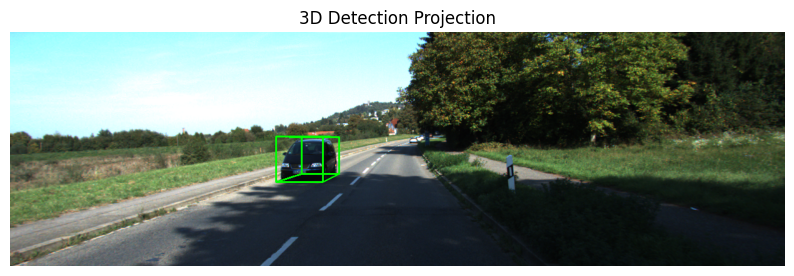

In [84]:
from opts import opts
from detectors.detector_factory import detector_factory
from utils.ddd_utils import compute_box_3d, project_to_image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---- Setup model and run inference ----
args = [
    'ddd',
    '--load_model', '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth',
    '--gpus', '0',
    '--debug', '0',
]
opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

img_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/3d-tests/kitti-test1.png'
calib_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/3d-tests/kitti-test1.txt'

image = cv2.imread(img_path)
if image is None:
    raise Exception(f"Failed to load image at: {img_path}")

# Run CenterNet DDD inference
results = detector.run(image)
boxresults = results['results']

# ---- Load calibration (P2 projection matrix) ----
# ---- Load calibration (P2 projection matrix) ----
with open(calib_path, 'r') as f:
    for line in f:
        if line.startswith('P2:'):
            P2_values = [float(x) for x in line.strip().split()[1:]]
            break
    else:
        raise ValueError("P2 matrix not found in calibration file.")

P2 = np.array(P2_values).reshape(3, 4)

# ---- Draw 3D boxes ----
def draw_projected_box3d(image, qs, color=(0, 255, 0), thickness=2):
    qs = qs.astype(np.int32)
    for k in range(0, 4):
        i, j = k, (k + 1) % 4
        cv2.line(image, tuple(qs[i]), tuple(qs[j]), color, thickness)
        cv2.line(image, tuple(qs[i + 4]), tuple(qs[j + 4]), color, thickness)
        cv2.line(image, tuple(qs[i]), tuple(qs[i + 4]), color, thickness)
    return image

colors = {
    1: (0, 255, 255),   # pedestrian
    2: (0, 255, 0),     # car
    3: (255, 255, 0),     # cyclist
}

score_thr = 0.4  # adjust as needed for class 1 and 2

for cls_id in boxresults:
    for i, det in enumerate(boxresults[cls_id]):
        score = det[0]

        if cls_id in [1, 2] and score < score_thr:
            print(f"Skipping class {cls_id} with low score {score:.2f}")
            continue  # skip only class 1 and 2 below threshold

        print(f"Class {cls_id}, Score {score:.2f}")

        try:
            h, w, l, x, y, z, ry = det[5:12]
            box_3d = compute_box_3d([h, w, l], [x, y, z], ry)
            box_2d = project_to_image(box_3d, P2)

            if np.any(np.isnan(box_2d)) or np.any(np.abs(box_2d) > 5000):
                print(f"Invalid projected box for class {cls_id}, skipping.")
                continue

            color = colors.get(cls_id, (255, 255, 255))
            image = draw_projected_box3d(image, box_2d, color=color)
            print(f"Drawn 3D box for class {cls_id}, score={score:.2f}")
        except Exception as e:
            print(f"Error drawing class {cls_id}: {e}")

# ---- Show result ----
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("3D Detection Projection")
plt.show()

Fix size testing.
training chunk_sizes: [32]
The output will be saved to  /content/gdrive/MyDrive/Pytorch-Models/CenterNet/src/lib/../../exp/ddd/default
heads {'hm': 3, 'dep': 1, 'rot': 8, 'dim': 3, 'wh': 2, 'reg': 2}
Creating model...
loaded /content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth, epoch 70


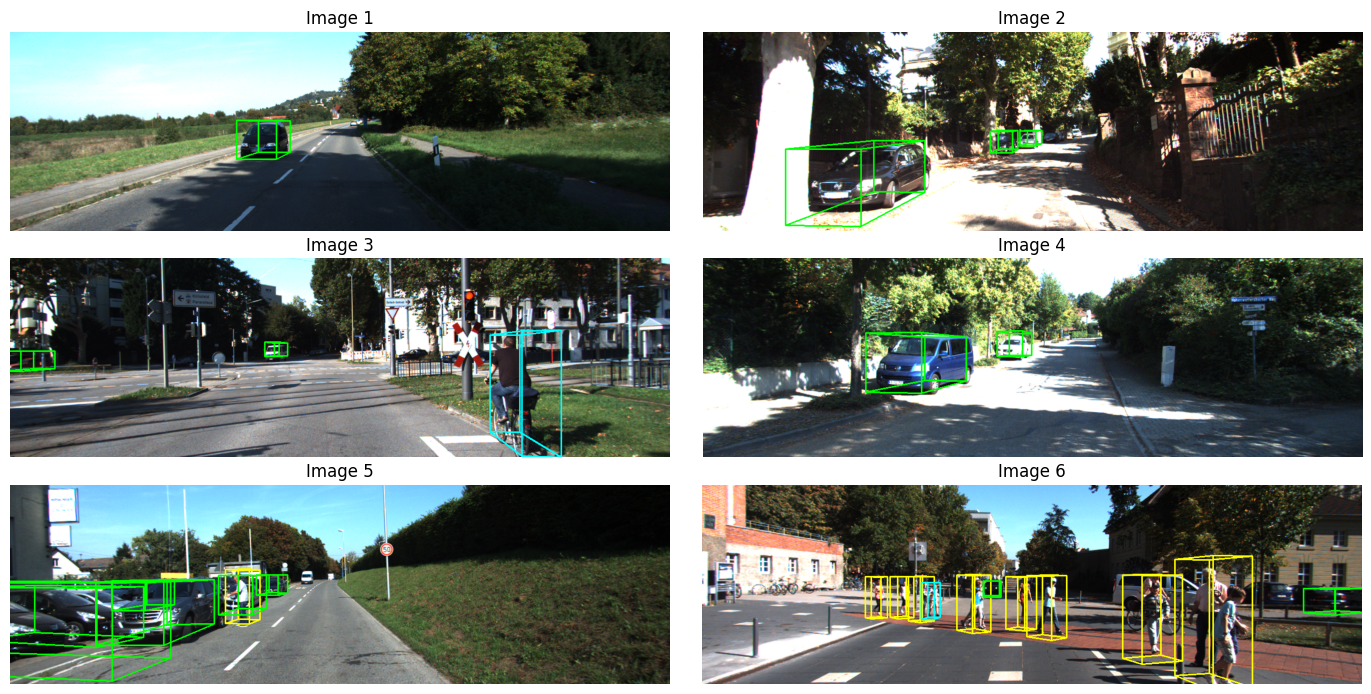

In [78]:
from opts import opts
from detectors.detector_factory import detector_factory
from utils.ddd_utils import compute_box_3d, project_to_image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Inference and Visualization Parameters ---
base_path = '/content/gdrive/MyDrive/Pytorch-Models/datasets/3d-tests'
image_txt_pairs = [
    (f'kitti-test{i}.png', f'kitti-test{i}.txt') for i in range(1, 7)
]
model_path = '/content/gdrive/MyDrive/Pytorch-Models/CenterNet/models/ddd_3dop.pth'
score_thr = 0.4

colors = {
    1: (0, 255, 255),  # pedestrian
    2: (0, 255, 0),    # car
    3: (255, 255, 0),  # cyclist
}

# --- Init CenterNet DDD model ---
args = [
    'ddd',
    '--load_model', model_path,
    '--gpus', '0',
    '--debug', '0',
]
opt = opts().init(args)
Detector = detector_factory[opt.task]
detector = Detector(opt)

# --- Helper: Draw 3D projected box ---
def draw_projected_box3d(image, qs, color=(0, 255, 0), thickness=2):
    qs = qs.astype(np.int32)
    for k in range(0, 4):
        i, j = k, (k + 1) % 4
        cv2.line(image, tuple(qs[i]), tuple(qs[j]), color, thickness)
        cv2.line(image, tuple(qs[i + 4]), tuple(qs[j + 4]), color, thickness)
        cv2.line(image, tuple(qs[i]), tuple(qs[i + 4]), color, thickness)
    return image

# --- Process and store all output images ---
results_images = []

for img_name, calib_name in image_txt_pairs:
    img_path = os.path.join(base_path, img_name)
    calib_path = os.path.join(base_path, calib_name)

    image = cv2.imread(img_path)
    if image is None:
        print(f"Failed to load image: {img_path}")
        continue

    # --- Load calibration P2 matrix ---
    with open(calib_path, 'r') as f:
        for line in f:
            if line.startswith('P2:'):
                P2_values = [float(x) for x in line.strip().split()[1:]]
                break
        else:
            print(f"P2 matrix not found in: {calib_path}")
            continue

    P2 = np.array(P2_values).reshape(3, 4)

    # --- Run detection ---
    results = detector.run(image)
    boxresults = results['results']

    for cls_id in boxresults:
        for i, det in enumerate(boxresults[cls_id]):
            score = det[0]
            if cls_id in [1, 2] and score < score_thr:
                continue

            try:
                h, w, l, x, y, z, ry = det[5:12]
                box_3d = compute_box_3d([h, w, l], [x, y, z], ry)
                box_2d = project_to_image(box_3d, P2)

                if np.any(np.isnan(box_2d)) or np.any(np.abs(box_2d) > 5000):
                    continue

                color = colors.get(cls_id, (255, 255, 255))
                image = draw_projected_box3d(image, box_2d, color=color)
            except Exception as e:
                print(f"Error drawing class {cls_id}: {e}")

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results_images.append(image_rgb)

# --- Plot all 6 images in 2x3 grid ---
plt.figure(figsize=(14, 7))
for i, img in enumerate(results_images):
    plt.subplot(3, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.tight_layout()
plt.show()